In [1]:
# Pandas a été développé pour s'attaquer au problème de TimeSeries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)

In [8]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


<AxesSubplot:xlabel='Date'>

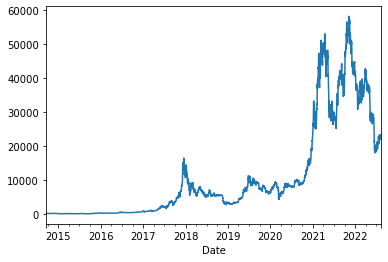

In [9]:
bitcoin['Close'].plot()

<AxesSubplot:xlabel='Date'>

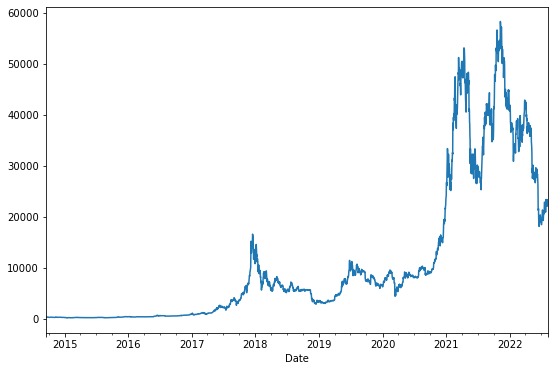

In [10]:
bitcoin['Close'].plot(figsize=(9, 6))

In [11]:
# Mais pas de date sur ce graphe,nous n'avons pas encore indiquer que nous voulions travailler dans une base temporelle
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-06', '2022-08-07', '2022-08-08',
               '2022-08-09', '2022-08-10'],
              dtype='datetime64[ns]', name='Date', length=2885, freq=None)

In [12]:
# on va définir un nouveau type d'index -> data time index
# !!!! il faut complèter la colonne read.csv à la base définit comme ceci : bitcoin = pd.read_csv('BTC-EUR.csv')
# et maintenant : bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date')
# Cela va avoir pour effet de remplacer la colonne d'index par les dates :-)
# Mais mt il faut dire à pandas que cette colonne d'index doit être interpreté comme une date
# pour cela ajouter : bitcoin = pd.read_csv('BTC-EUR.csv', index_col='Date', parse_dates=True)
# info -> la ligne DatetimeIndex de la ligne avant à évidemment évoluer depuis ces deux changements
# La on peut commencer l'analyse de time series

C:\Users\Geoffrey\AppData\Local\Temp/ipykernel_22200/1646260784.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019']['Close'].plot()


<AxesSubplot:xlabel='Date'>

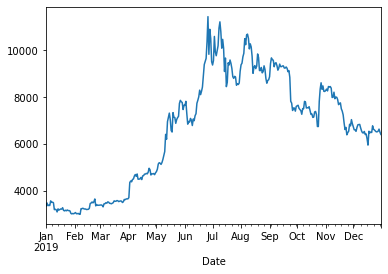

In [13]:
bitcoin['2019']['Close'].plot()
#bien noté la remarque ici en dessous!! plus bas j'utiliserai la fonction loc mais comme ca on voit les 2

C:\Users\Geoffrey\AppData\Local\Temp/ipykernel_22200/361147746.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  bitcoin['2019-09']['Close'].plot()


<AxesSubplot:xlabel='Date'>

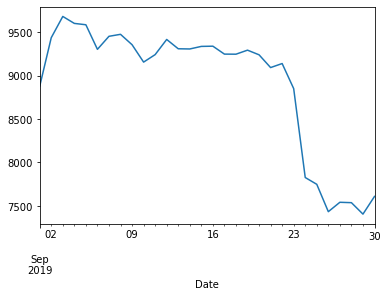

In [14]:
bitcoin['2019-09']['Close'].plot()

<AxesSubplot:xlabel='Date'>

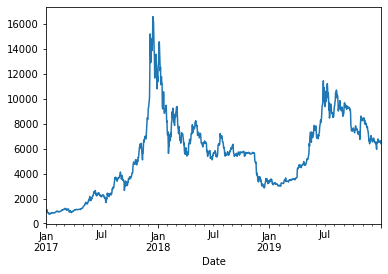

In [15]:
# pour faire du slicing -> 2 méthodes
# classique mais désuette
bitcoin['2017':'2019']['Close'].plot()

<AxesSubplot:xlabel='Date'>

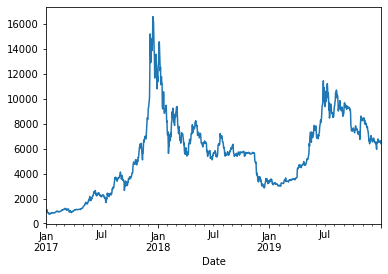

In [16]:
# ou avec fct loc
bitcoin.loc['2017':'2019', 'Close'].plot()

In [17]:
# Si fichier écrit avec différents type de format pas de soucis pandas s'adapte à bcp de types de format

In [18]:
# => différentes fonctions pour l'analyse
# 1) resample -> permet de regrouper les données selon une fréquence temporel

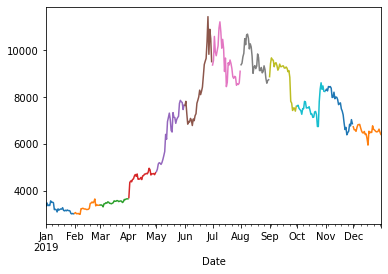

In [19]:
bitcoin.loc['2019', 'Close'].resample('M').plot()
plt.show()


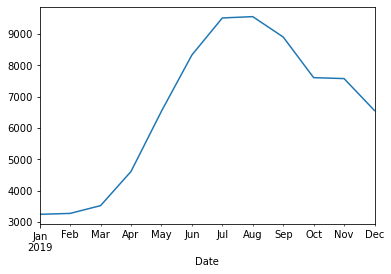

In [20]:
# on peut maintenant faire ce qu'on veut, moyenne, variance, ecart type sur 1 ou plusieur ou chaque mois
# ici on le fait sur chaque mois en collant une fct mean()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot()
plt.show()

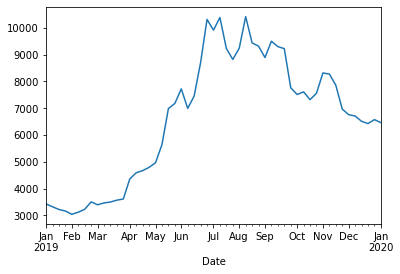

In [21]:
# même chose toutes les semaines
bitcoin.loc['2019', 'Close'].resample('W').mean().plot()
plt.show()

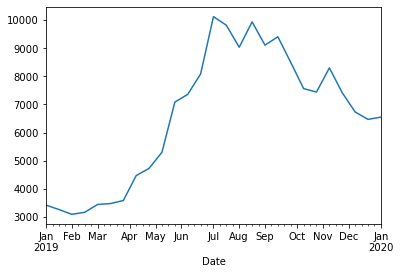

In [22]:
# ou toutes les deux semaines avec 2W
bitcoin.loc['2019', 'Close'].resample('2W').mean().plot()
plt.show()

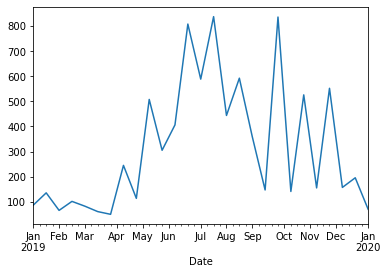

In [23]:
# Avec l'écart type on peut regarder à quel point le bitcoin était volatil en 2019
bitcoin.loc['2019', 'Close'].resample('2W').std().plot()
plt.show()

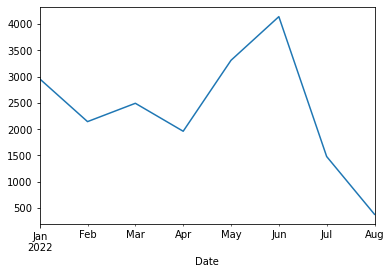

In [24]:
# et en 2022
bitcoin.loc['2022', 'Close'].resample('M').std().plot()
plt.show()

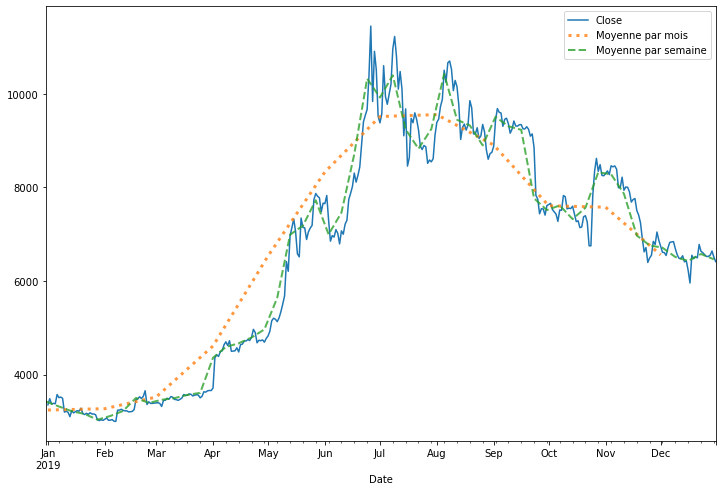

In [25]:
# Mt on peut mettre le tout sur une seule figure
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].resample('M').mean().plot(label='Moyenne par mois', lw=3, ls=':', alpha=0.8)
bitcoin.loc['2019', 'Close'].resample('W').mean().plot(label='Moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

In [26]:
# 2eme fct => aggragate
# on l'utilise souvent avec resample pour regrouper dans 1 seul tableau plusieurs stat comme mean() et std() et min() et max()
# il y a évidemment d'autres fct stat, ici c'est juste un exemple
bitcoin.loc['2019', 'Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Date,,,,
2019-01-06,3422.916626,86.768296,3353.505859,3572.601807
2019-01-13,3317.593401,180.066248,3100.221680,3518.607910
2019-01-20,3216.173340,36.646566,3168.373535,3280.021484
2019-01-27,3157.861154,15.218334,3140.374756,3183.176025
2019-02-03,3035.448347,19.472269,3015.454102,3073.150146
2019-02-10,3114.468541,123.483779,2998.157227,3258.583740
2019-02-17,3222.201835,17.498269,3202.042725,3252.190186
2019-02-24,3500.129360,88.628342,3359.558594,3653.833008
2019-03-03,3392.695312,12.224585,3381.982910,3416.384521


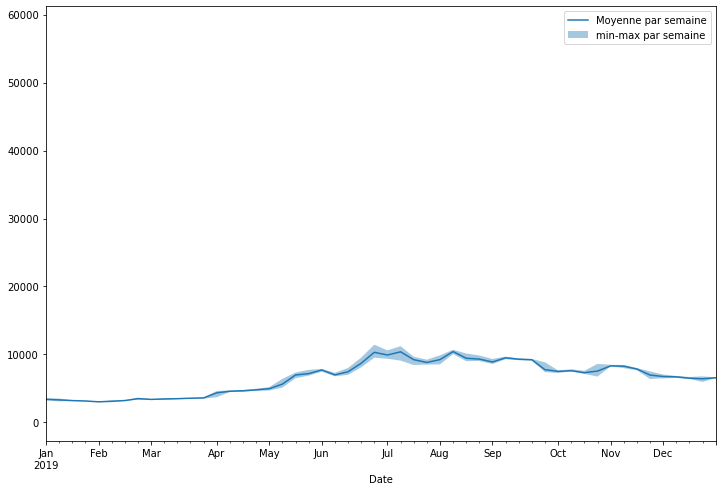

In [27]:
# faire un graphe sympa à partir de ces données
# 1 enregistrer ces données dans une variable m
m = bitcoin['Close'].resample('W').agg(['mean', 'std', 'min', 'max'])
# 2 on "ouvre ou cré une figure
plt.figure(figsize=(12, 8))
m['mean']['2019'].plot(label='Moyenne par semaine')
# 3 indiquer la zone d'incertitude avec min et max
plt.fill_between(m.index, m['max'], m['min'], alpha=0.4, label='min-max par semaine')

plt.legend()
plt.show()

In [28]:
# axe des ordonnées est disproportionné, trop grand -> à corriger


In [29]:
# 3eme fct => moving average (fct rolling() -> moyenne sur une fenêtre de valeur (fenêtre à définir) avec fonction rolling(window)
bitcoin.loc['2019', 'Close'].rolling(window=7)

Rolling [window=7,center=False,axis=0,method=single]

<AxesSubplot:xlabel='Date'>

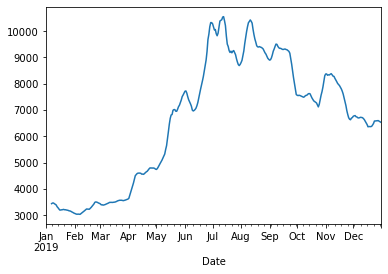

In [30]:
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot()

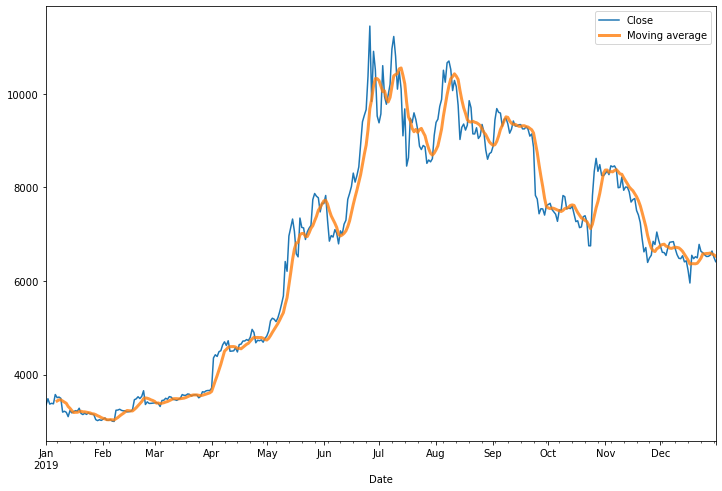

In [31]:
# si on mets ça sur notre graphe de 2019
plt.figure(figsize=(12, 8))
bitcoin.loc['2019', 'Close'].plot()
bitcoin.loc['2019', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, alpha=0.8)

plt.legend()
plt.show()

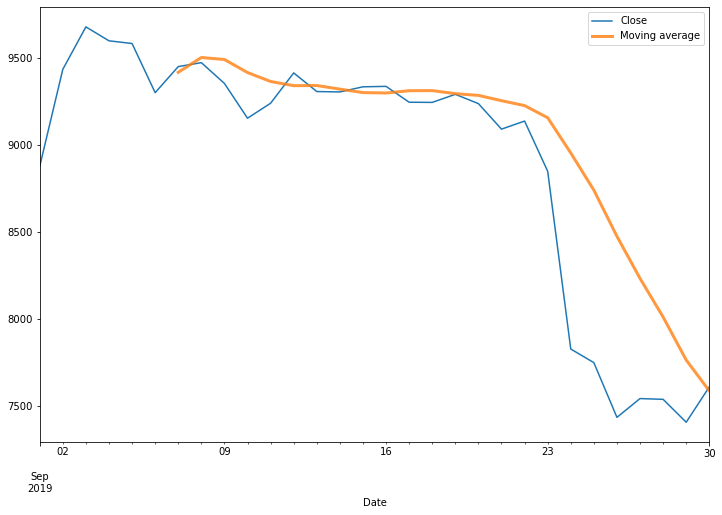

In [32]:
# on voit que le début ne commence pas en même temps, essayons la même chose sur un mois pour voir plus de détails
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
bitcoin.loc['2019-09', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, alpha=0.8)

plt.legend()
plt.show()

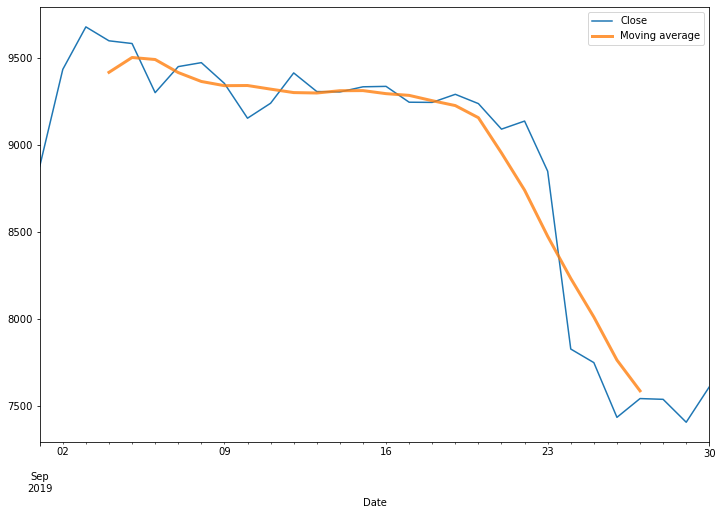

In [33]:
# il faut recentrer la moyenne dans la fenêtre
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-9', 'Close'].plot()
bitcoin.loc['2019-9', 'Close'].rolling(window=7, center=True).mean().plot(label='Moving average', lw=3, alpha=0.8)

plt.legend()
plt.show()

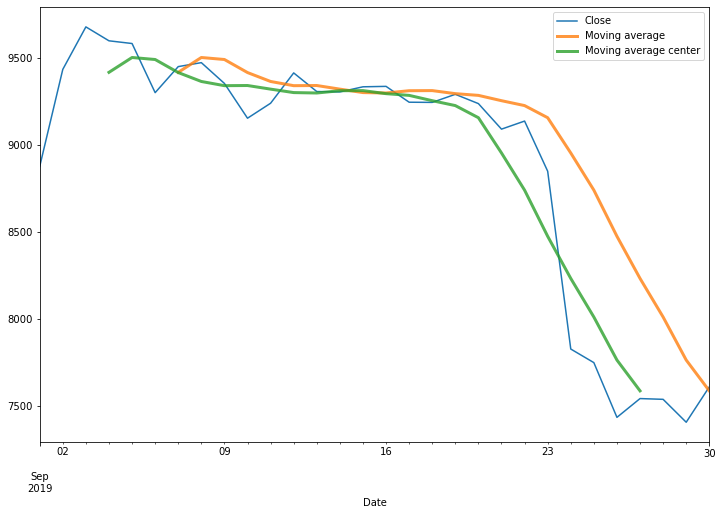

In [34]:
#superposons les 2 pour mieux voir
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-9', 'Close'].plot()
bitcoin.loc['2019-9', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, alpha=0.8)
bitcoin.loc['2019-9', 'Close'].rolling(window=7, center=True).mean().plot(label='Moving average center', lw=3, alpha=0.8)

plt.legend()
plt.show()

In [35]:
# C'est pas encore ça -> c'est parce que la moving average n'est pas toujours la meilleur des choses à faire
# 4eme fct => Exponentiel weighted average -> moyenne mobile(pondérée) exponentielle
# Dans pandas c'est la fonction EWM -> superposer sur graphe d'avant


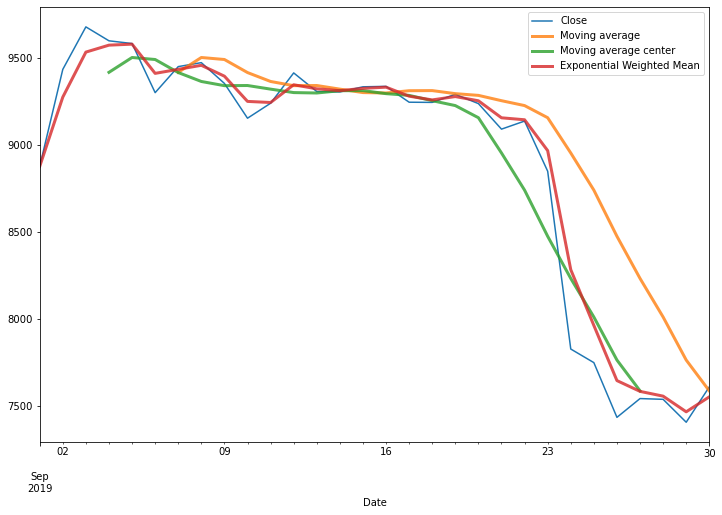

In [36]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-9', 'Close'].plot()
bitcoin.loc['2019-9', 'Close'].rolling(window=7).mean().plot(label='Moving average', lw=3, alpha=0.8)
bitcoin.loc['2019-9', 'Close'].rolling(window=7, center=True).mean().plot(label='Moving average center', lw=3, alpha=0.8)
bitcoin.loc['2019-9', 'Close'].ewm(alpha=0.6).mean().plot(label='Exponential Weighted Mean', lw=3, alpha=0.8)

plt.legend()
plt.show()

In [37]:
# On voit que le ewm est plus adapté
# Avec une petite boucle for python on peut tester plusieur valeur du paramètre  alpha pour lisser et faire en sorte que ça colle mieux

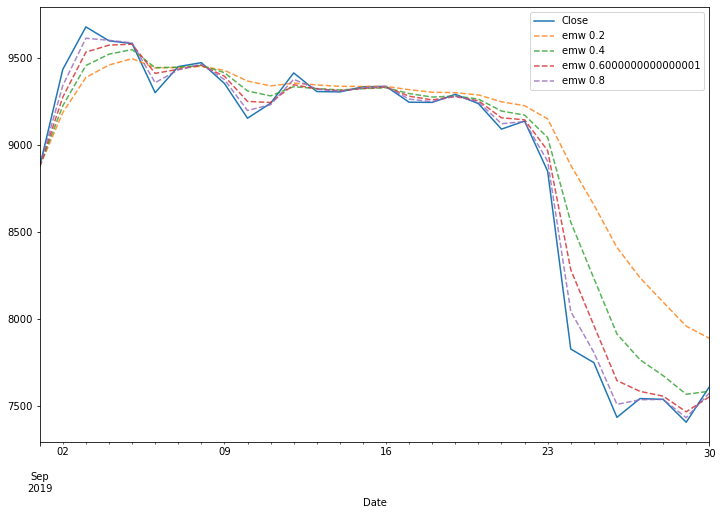

In [38]:
plt.figure(figsize=(12, 8))
bitcoin.loc['2019-09', 'Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    bitcoin.loc['2019-09', 'Close'].ewm(alpha=i).mean().plot(label=f'emw {i}', ls='--', alpha=0.8)

plt.legend()
plt.show()
    

In [39]:
# Comment assembler 2 data set 
# 5eme fct -> merge()
# -> importer le dataset d'une autre crypto eutherium
euth = pd.read_csv('ETH-EUR.csv', index_col='Date', parse_dates=True)

<AxesSubplot:xlabel='Date'>

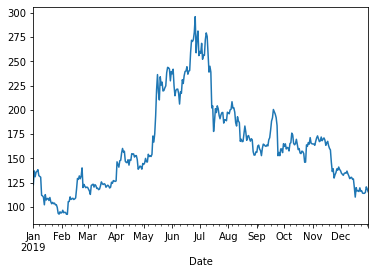

In [40]:
euth.loc['2019', 'Close'].plot()

In [41]:
# plus ou moins la même tendance que le bitcoin -> vérifier en assemblant les deux dataset
# how() est la façon dont l'assemblage doit s'effectuer
# how=outer how=inner how=left how=right
#essayons avec inner
pd.merge(bitcoin, euth, on='Date', how='inner')

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-06,22863.117188,22897.609375,22539.021484,22539.021484,22539.021484,15684419685,1700.799194,1712.250000,1660.548462,1660.548462,1660.548462,11541683709
2022-08-07,22541.207031,22955.015625,22473.525391,22783.662109,22783.662109,15617948551,1660.666138,1694.958862,1642.143677,1670.590942,1670.590942,10078583963
2022-08-08,22787.236328,23732.878906,22792.974609,23347.226563,23347.226563,28020750644,1670.927856,1771.738892,1668.244873,1741.044434,1741.044434,16514448149


In [42]:
# les x correspondent au bitcoin et y à ethereum
#Pour changer ça ->
pd.merge(bitcoin, euth, on='Date', how='inner', suffixes=('_btc', '_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2017-11-11,5674.877930,5893.123535,5319.574707,5451.084473,5451.084473,4208762919,256.011322,273.902954,255.673492,269.811371,269.811371,722199256
2017-11-12,5397.796387,5680.399414,4732.066895,5102.976074,5102.976074,7682118257,269.819092,273.739624,255.948730,264.072021,264.072021,1383773530
2017-11-13,5092.838867,5835.995117,5016.558105,5624.187988,5624.187988,5370187705,263.314758,281.949707,263.405121,271.556213,271.556213,893329318
2017-11-14,5625.894043,5796.897949,5494.685547,5628.764160,5628.764160,2711943351,271.596497,290.873871,271.573212,286.394958,286.394958,907354313
2017-11-15,5627.924316,6227.523438,5626.492188,6209.081543,6209.081543,3565506814,286.677399,289.079956,279.644714,282.937531,282.937531,613364441
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-06,22863.117188,22897.609375,22539.021484,22539.021484,22539.021484,15684419685,1700.799194,1712.250000,1660.548462,1660.548462,1660.548462,11541683709
2022-08-07,22541.207031,22955.015625,22473.525391,22783.662109,22783.662109,15617948551,1660.666138,1694.958862,1642.143677,1670.590942,1670.590942,10078583963
2022-08-08,22787.236328,23732.878906,22792.974609,23347.226563,23347.226563,28020750644,1670.927856,1771.738892,1668.244873,1741.044434,1741.044434,16514448149


In [43]:
# Attention !!!! le merge commence avec des données 2017 ce qui veut dire que les données depuis 2014 sont à la poubelle
# les deux dataset n'étaient pas identique, avec numpy ->problème mais avec pandas -> solution
# => how=inner a permit d'assembler seulement sur les index qu'ils ont en commun
# => how=outer assemble sur toutes l'étendue et même ce qu'il ne partage pas
pd.merge(bitcoin, euth, on='Date', how='outer', suffixes=('_btc', '_eth'))

,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,1.638917e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,2.669185e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,2.956010e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,2.873683e+07,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,2.070262e+07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-07,22541.207031,22955.015625,22473.525391,22783.662109,22783.662109,1.561795e+10,1660.666138,1694.958862,1642.143677,1670.590942,1670.590942,1.007858e+10
2022-08-08,22787.236328,23732.878906,22792.974609,23347.226563,23347.226563,2.802075e+10,1670.927856,1771.738892,1668.244873,1741.044434,1741.044434,1.651445e+10
2022-08-09,23349.183594,23441.267578,22445.599609,22691.765625,22691.765625,2.307518e+10,1741.588867,1750.905640,1636.735474,1668.283325,1668.283325,1.603470e+10


In [44]:
# dans notre cas pour des raisons pratique -> on va utiliser inner
btc_eth = pd.merge(bitcoin, euth, on='Date', how='inner', suffixes=('_btc', '_eth'))

<AxesSubplot:xlabel='Date'>

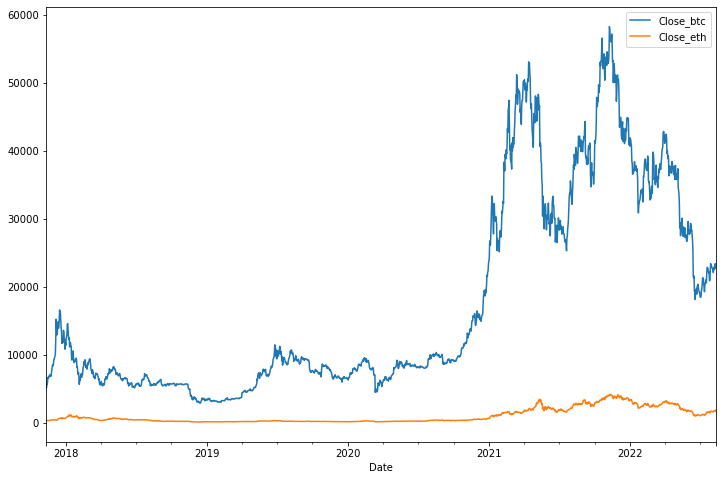

In [49]:
btc_eth[['Close_btc', 'Close_eth']].plot(figsize=(12, 8))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

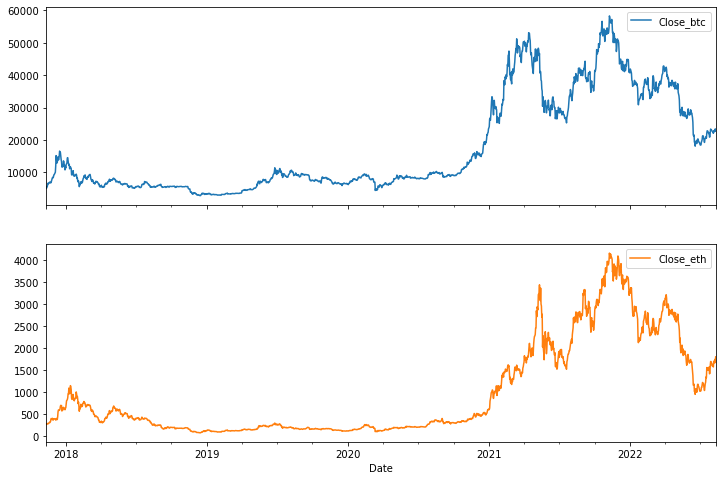

In [51]:
# Comme les deux crypto ne partage pas la même échelle -> les mettre sur deux graphe côte à côte avec subplot=True dans fct plot
btc_eth[['Close_btc', 'Close_eth']].plot(subplots=True, figsize=(12, 8))

In [52]:
# ça a l'air bien correlé ?? -> vérifions avec une matrice de corrélation dans pandas
btc_eth[['Close_btc', 'Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.00000,0.93117
Close_eth,0.93117,1.00000


In [ ]:
# test pour save